<style TYPE="text/css">
code.has-jax {font: inherit; font-size: 100%; background: inherit; border: inherit;}
</style>
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        skipTags: ['script', 'noscript', 'style', 'textarea', 'pre'] // removed 'code' entry
    }
});
MathJax.Hub.Queue(function() {
    var all = MathJax.Hub.getAllJax(), i;
    for(i = 0; i < all.length; i += 1) {
        all[i].SourceElement().parentNode.className += ' has-jax';
    }
});
</script>
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>

Check the source to this cell to see a way to put MathJax into Jupyter files

We are doing a two-site Hubbard model:
$\hat{H} = t \sum_\sigma (c_1^\dagger c_2 + c_2^\dagger c_1) + U(n_{1\uparrow}n_{1\downarrow} + n_{2\uparrow}n_{2\downarrow}) $.

There are (question: are these the only three?) three independent states in the Hilbert space:
 * $|s\rangle = |12\rangle + |21\rangle$ (singlet)
 * $|d\rangle = |11\rangle + |22\rangle$ (singlet)
 * $|t\rangle = |11\rangle - |22\rangle$ (triplet)
 
where I have just written the spacial part and all should be multiplied by $1/\sqrt{2}$. (naming scheme: single occupancy singlet, double occupancy singlet, triplet)

A general normalized wave function can be written as a linear superposition of those three wave functions: $|\Psi\rangle = c_1|s\rangle + c_2|d\rangle + c_3|t\rangle$, where $|c|^2=1$.

Non-zero matrix elements of $\hat{H}$: 
 * $\langle s | H | s \rangle = 0$ 
 * $\langle d | H | d \rangle = U$
 * $\langle t | H | t \rangle = 0$
 * $\langle s | H | d \rangle = \frac{1}{2}(4t)=2t$
 


In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm

%matplotlib inline 

def H_expectation(c,t,U):
  H=np.zeros((3,3))
  H[1,1]=U
  H[0,1]=2*t
  H[1,0]=2*t
  return np.dot(c.T,np.dot(H,c)).diagonal()

def sample_c(npts):
  thetag=np.linspace(0.0,math.pi/2.,npts)
  phig=np.linspace(1/float(npts),2*math.pi,npts)
  thetas,phis=np.meshgrid(thetag,phig)
  thetas=thetas.flatten()
  phis=phis.flatten()
  n=phis.shape[0]
  c=np.zeros((3,n))
  c[0,:]=np.cos(thetas)
  c[1,:]=np.sin(thetas)*np.cos(phis)
  c[2,:]=np.sin(thetas)*np.sin(phis)
  return c

def make_plot(c,eh,ax,npts=100):
  x=c[1,:]
  y=c[2,:]
  X,Y=np.meshgrid(np.linspace(x.min(),x.max(),npts),
                  np.linspace(y.min(),y.max(),npts) ) 
  eH=griddata((x,y),eh,(X,Y),method='linear',fill_value=np.mean(eh))
  #print(x.shape,y.shape,eH.shape)
  ax.imshow(np.flipud(eH),cmap=cm.RdYlGn,
            extent=[x.min(),x.max(),y.min(),y.max()],
            interpolation='bicubic')
  #You can uncomment this to get contour lines and 
  #to plot the sample points.
  #CS = ax.contour(X, Y, eH,color='k',linewidth=1)
  #ax.clabel(CS, inline=1, fontsize=4,color='k')
  #ax.plot(x,y,linestyle="",marker='o',color='k',markersize=1)
  ax.set_xlabel("$c_1$")
  ax.set_ylabel("$c_2$")

def plot_eigenfunctions(t,U,ax):
  H=np.zeros((3,3))
  H[1,1]=U
  H[0,1]=2*t
  H[1,0]=2*t
  w,v=np.linalg.eigh(H)
  v[:,v[0,:]<1]*=-1
  ax.plot(v[1,:],v[2,:],marker='o',markersize=5,color='b',mew=1,linestyle="")




c=sample_c(100)

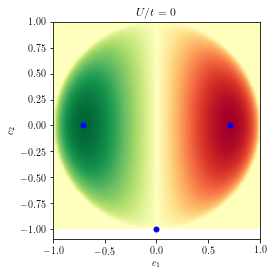

In [2]:
make_plot(c,H_expectation(c,-1.0,0.0),plt.gca())
plot_eigenfunctions(-1.,0.,plt.gca())
plt.title("$U/t=0$")
plt.savefig("hilbert_heatmap_noninteracting.pdf",bbox="inches")

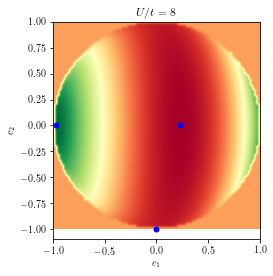

In [3]:
make_plot(c,H_expectation(c,-1.0,8.0),plt.gca())
plot_eigenfunctions(-1.,8.,plt.gca())
plt.title("$U/t=8$")
plt.savefig("hilbert_heatmap_U8.pdf",bbox="inches")

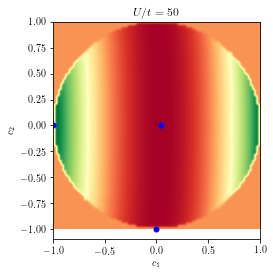

In [4]:
make_plot(c,H_expectation(c,-1.0,50.0),plt.gca())
plot_eigenfunctions(-1.,50.,plt.gca())
plt.title("$U/t=50$")
plt.savefig("hilbert_heatmap_U50.pdf",bbox="inches")

The blue dots above are the eigenvectors. Energy goes from red->yellow->green. I think there are some interesting facts one can read off of these plots:
 * The singlet-triplet gap occurs because the singlet ground state is decreased in energy due to $t$
 * Increasing $U$ pushes the ground state back to $c_1 \sim 0$, which makes it relatively closer in energy to the triplet (but be careful about scales, which aren't plotted here).
 * Since the triplet and singlet do not mix in the Hamiltonian, the eigenvectors are always along either $c_1=0$ or $c_2=0$ lines.
 * Also since the triplet and singlet don't mix, the expectation value of the Hamiltonian is a separable function of $c_1$ and $c_2$. the only dependence is normalization..

Going beyond this treatment:
 * We are missing a vector in the singlet space: $|11\rangle - |22\rangle$. This is an odd parity state, which can't mix with the other two similarly to the triplet wave function. So we know that the map will be a separable function of that wave function coefficient. 
 * We could have written our wave function in a different basis. A particularly interesting one is the molecular orbital basis. In this basis, the $U/t=0$ case is much simpler (try it!). 
 * In the molecular orbital basis, for $U/t=0$, the Hessian with respect to the wave function coefficient is related to the excitation energy. To see this, write down a non-interacting Hamiltonian and evaluate the expectation value of H, then take the second derivatives. With the Hessian at the ground state, one could determine the entire model! Note that we can calculate this Hessian in QMC. :)
 